In [100]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2
from scipy import signal

debugMode = False
paddingTime = 17000
# 1 
# 2
# 3 17000

#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [101]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/3回目/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

print(acc)
print(ans)

            time         x         y         z       abs
0       0.273055  0.114922  0.057461 -0.124498  0.178910
1       0.293081 -0.086191  0.134075 -0.201113  0.256616
2       0.313069 -0.019154  0.229843 -0.268151  0.353694
3       0.333063 -0.095768  0.239420 -0.095768  0.275073
4       0.353052  0.076614  0.095768  0.248997  0.277562
...          ...       ...       ...       ...       ...
8308  166.433056  0.306458 -1.877054  1.369483  2.343658
8309  166.453035 -0.603339 -1.350330  0.181959  1.490140
8310  166.473053 -0.900220 -0.976834  1.934515  2.346689
8311  166.493052 -0.248997 -1.426944 -0.622492  1.576600
8312  166.513101  0.555455 -1.637634 -1.570596  2.336054

[8313 rows x 5 columns]
            time content
0  1692566110576     止まる
1  1692566123808      歩く
2  1692566153810      走る
3  1692566176662      歩く
4  1692566213808      走る
5  1692566233789      歩く
6  1692566235061     止まる


止まる
17.0 30.232
歩く
30.232 60.234
走る
60.234 83.086
歩く
83.086 120.232
走る
120.232 140.213
歩く
140.213 141.485
止まる
141.485 166.513101


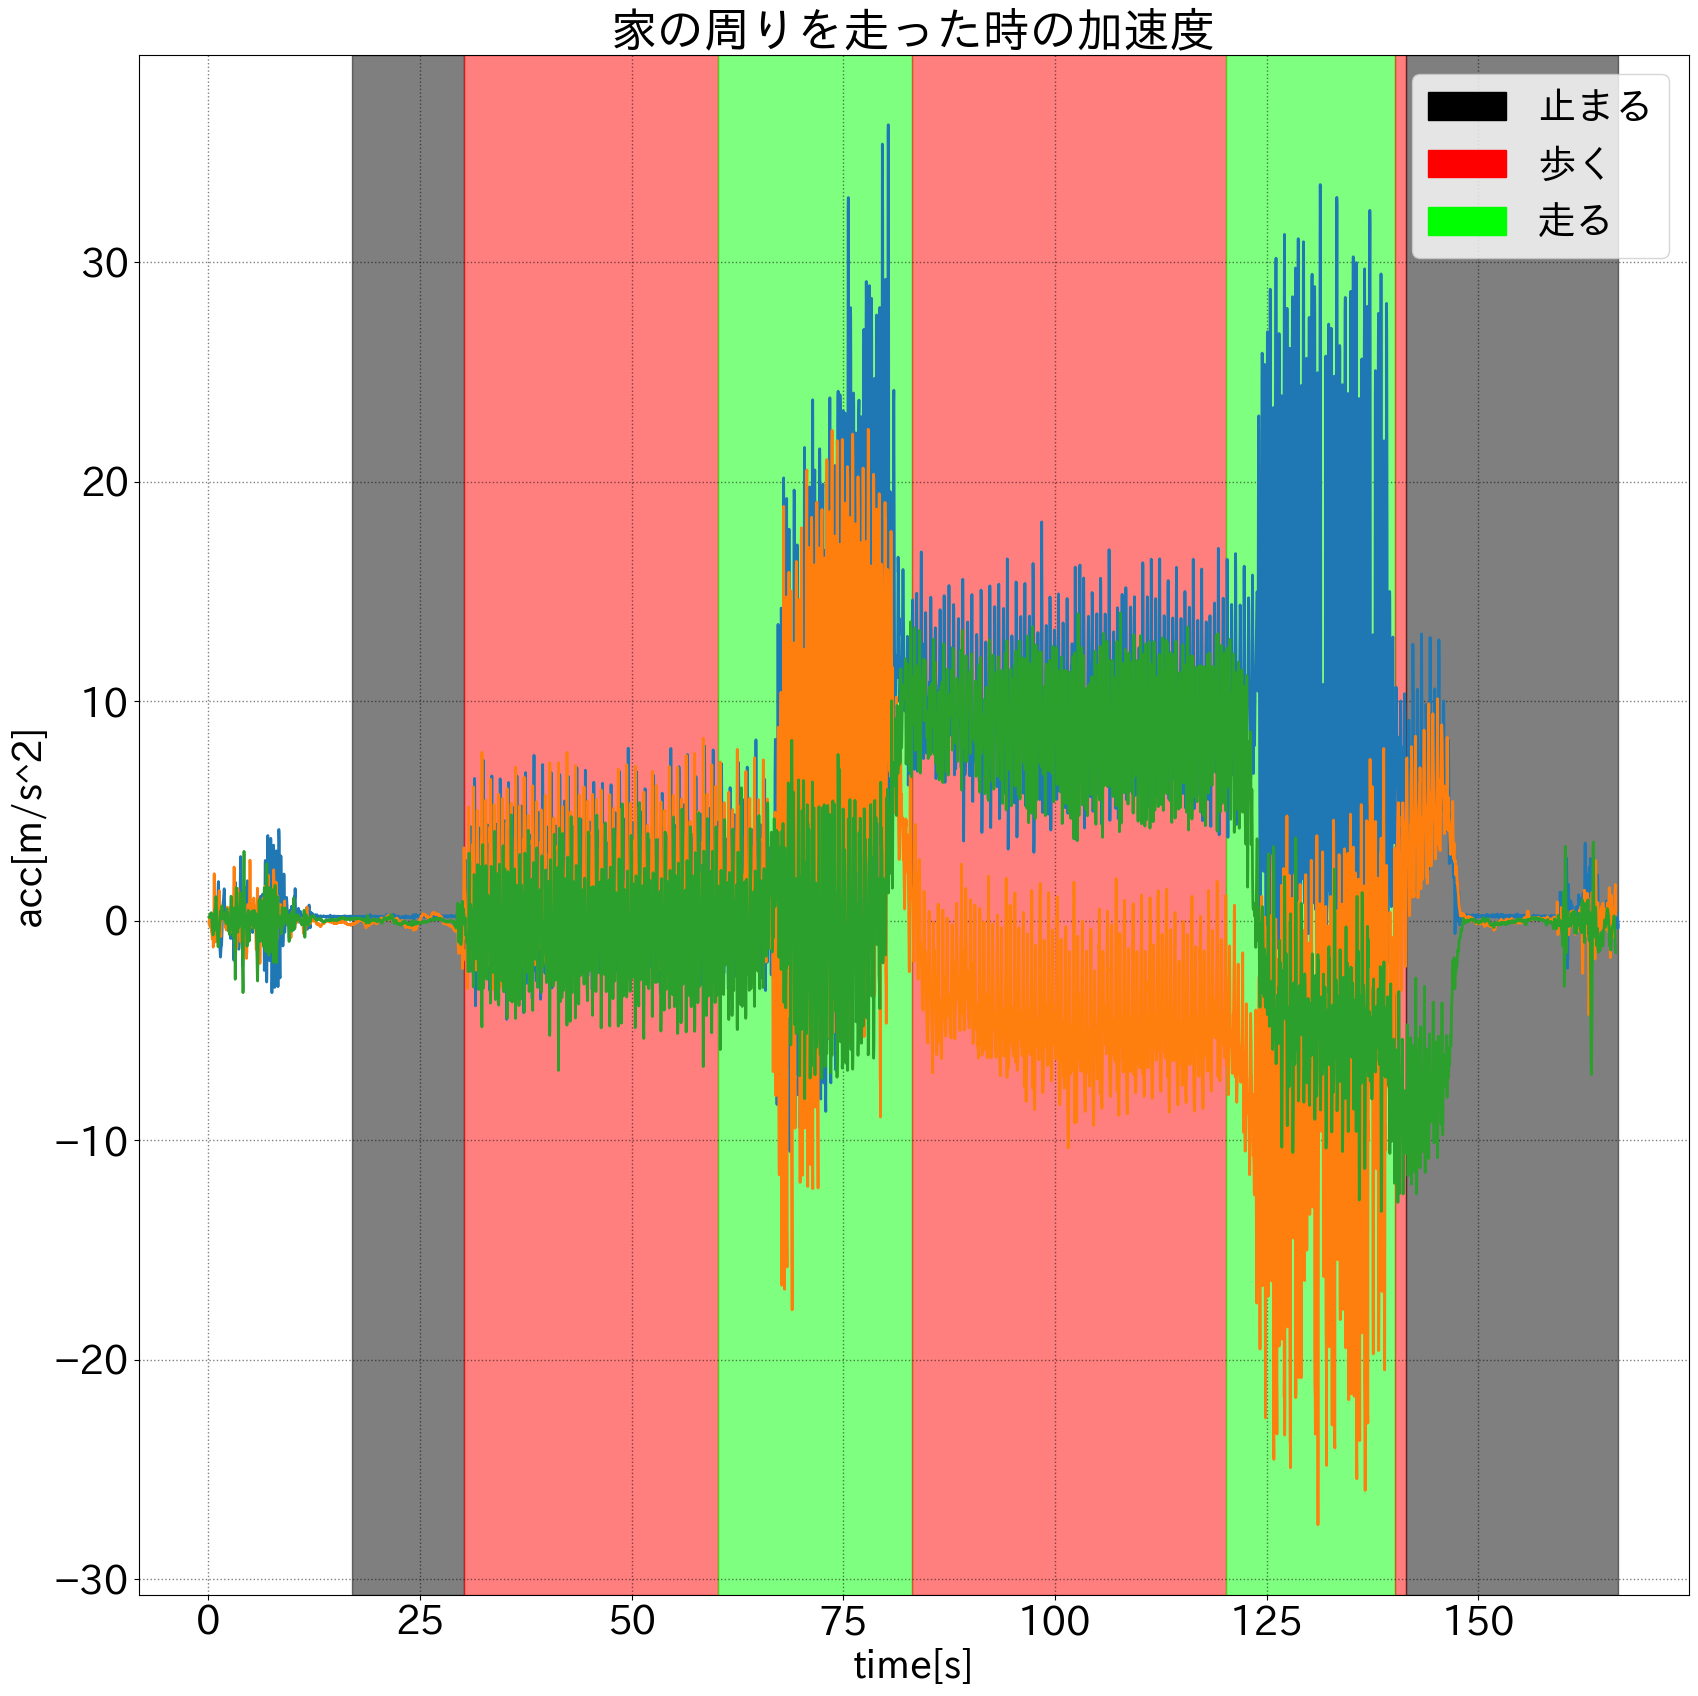

In [102]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の加速度")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"]),
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]),
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]),
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

止まる
17.0 30.232
歩く
30.232 60.234
走る
60.234 83.086
歩く
83.086 120.232
走る
120.232 140.213
歩く
140.213 141.485
止まる
141.485 166.513101


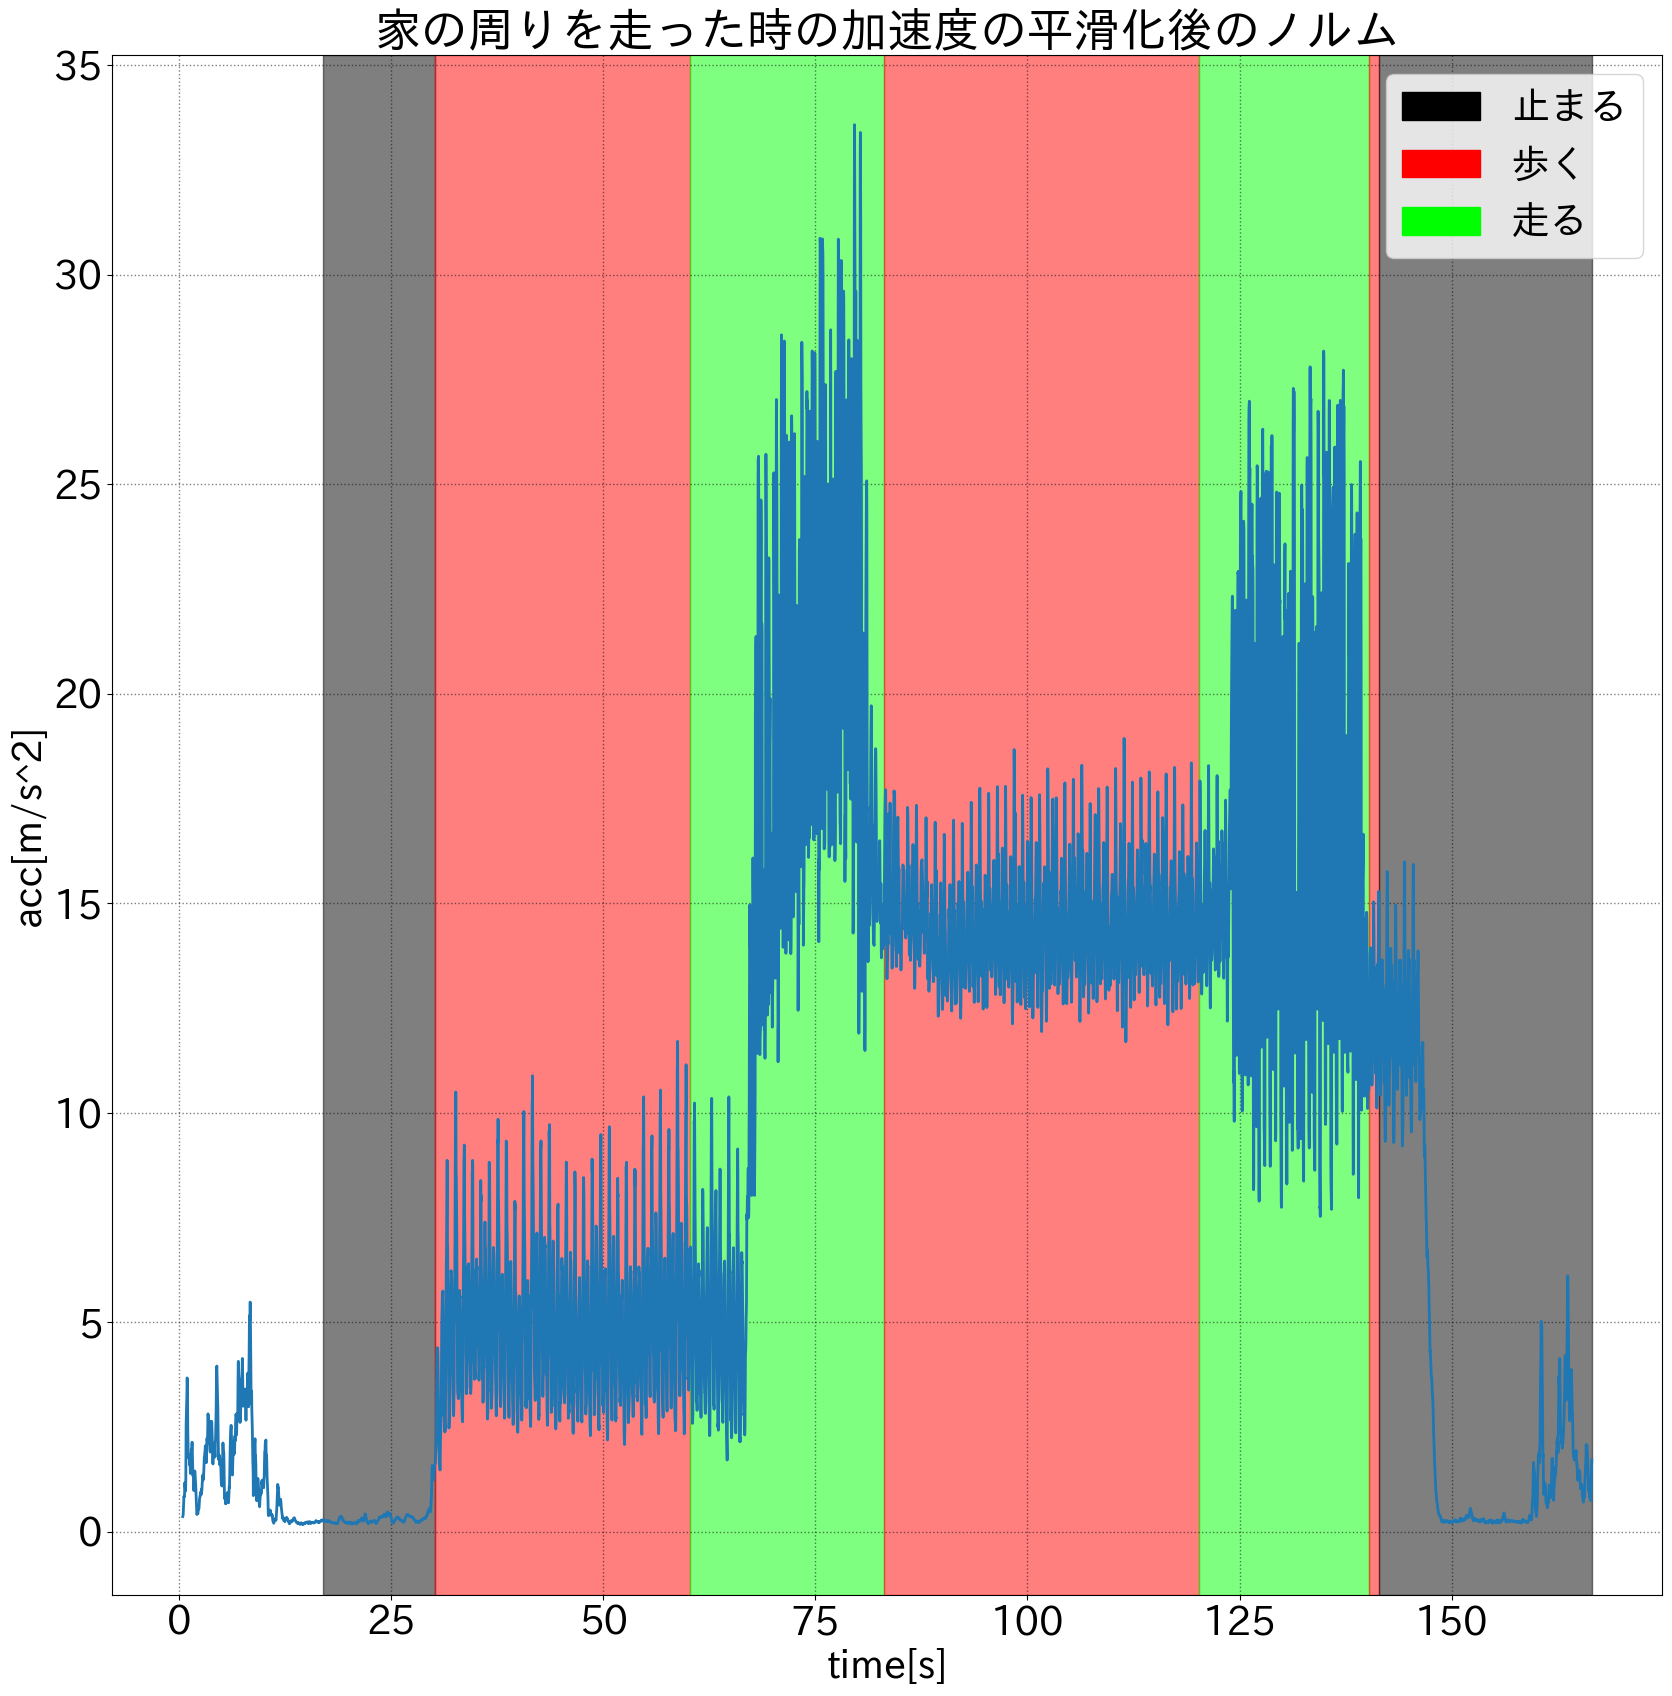

In [103]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の加速度の平滑化後のノルム")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作

x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

## ノイズ除去
ax3.plot(
    (acc["time"]),
    norm_acc,
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

周波数 1.9
止まる
17.0 30.232
歩く
30.232 60.234
走る
60.234 83.086
歩く
83.086 120.232
走る
120.232 140.213
歩く
140.213 141.485
止まる
141.485 166.513101


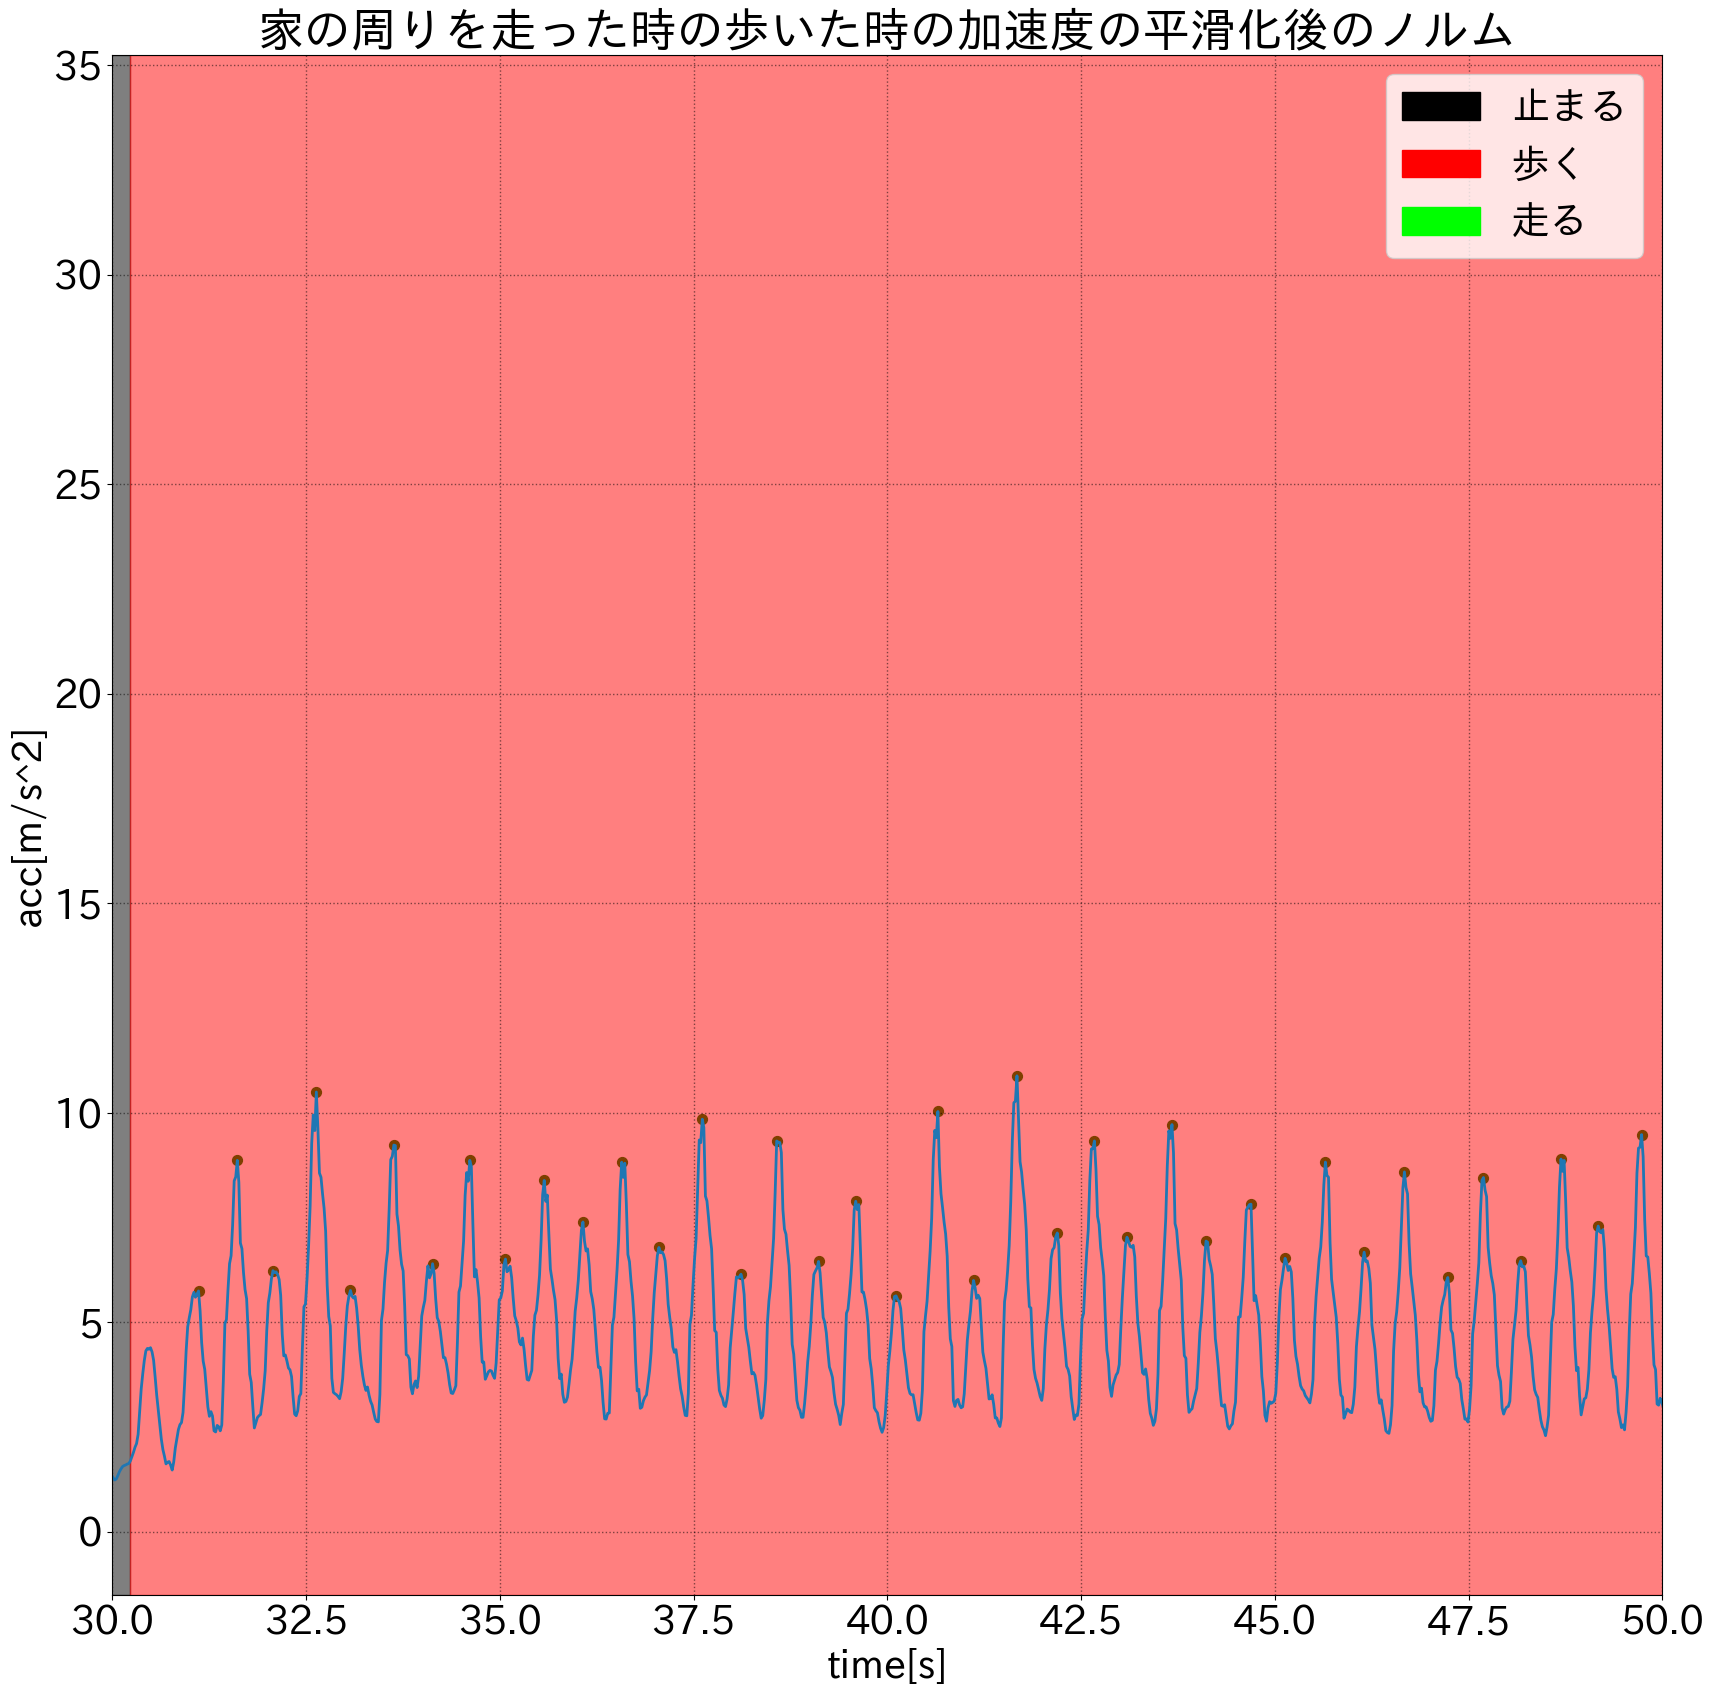

In [104]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の歩いた時の加速度の平滑化後のノルム")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作

x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

## ノイズ除去
ax3.plot(
    (acc["time"]),
    norm_acc,
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

## ピーク値を取得
peak , _ = signal.find_peaks(norm_acc, height=5, distance=10)
plt.scatter(acc["time"][peak], norm_acc[peak], c="g", s=50)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}


## 表示するデータの範囲を指定秒数にする
start_time = 30
end_time = 50
ax3.set_xlim(start_time, end_time)

## 周波数の取得
new_peak = []
for i in range(len(peak) - 1):
    ## endtime - starttimeの間にピークがあるかどうか
    # print(acc["time"][peak[i]])
    if (acc["time"][peak[i]] > start_time ) and (acc["time"][peak[i]] < end_time ):
        new_peak.append(peak[i])
freq = len(new_peak) / (end_time - start_time)
print("周波数", freq)

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

周波数 3.3
止まる
17.0 30.232
歩く
30.232 60.234
走る
60.234 83.086
歩く
83.086 120.232
走る
120.232 140.213
歩く
140.213 141.485
止まる
141.485 166.513101


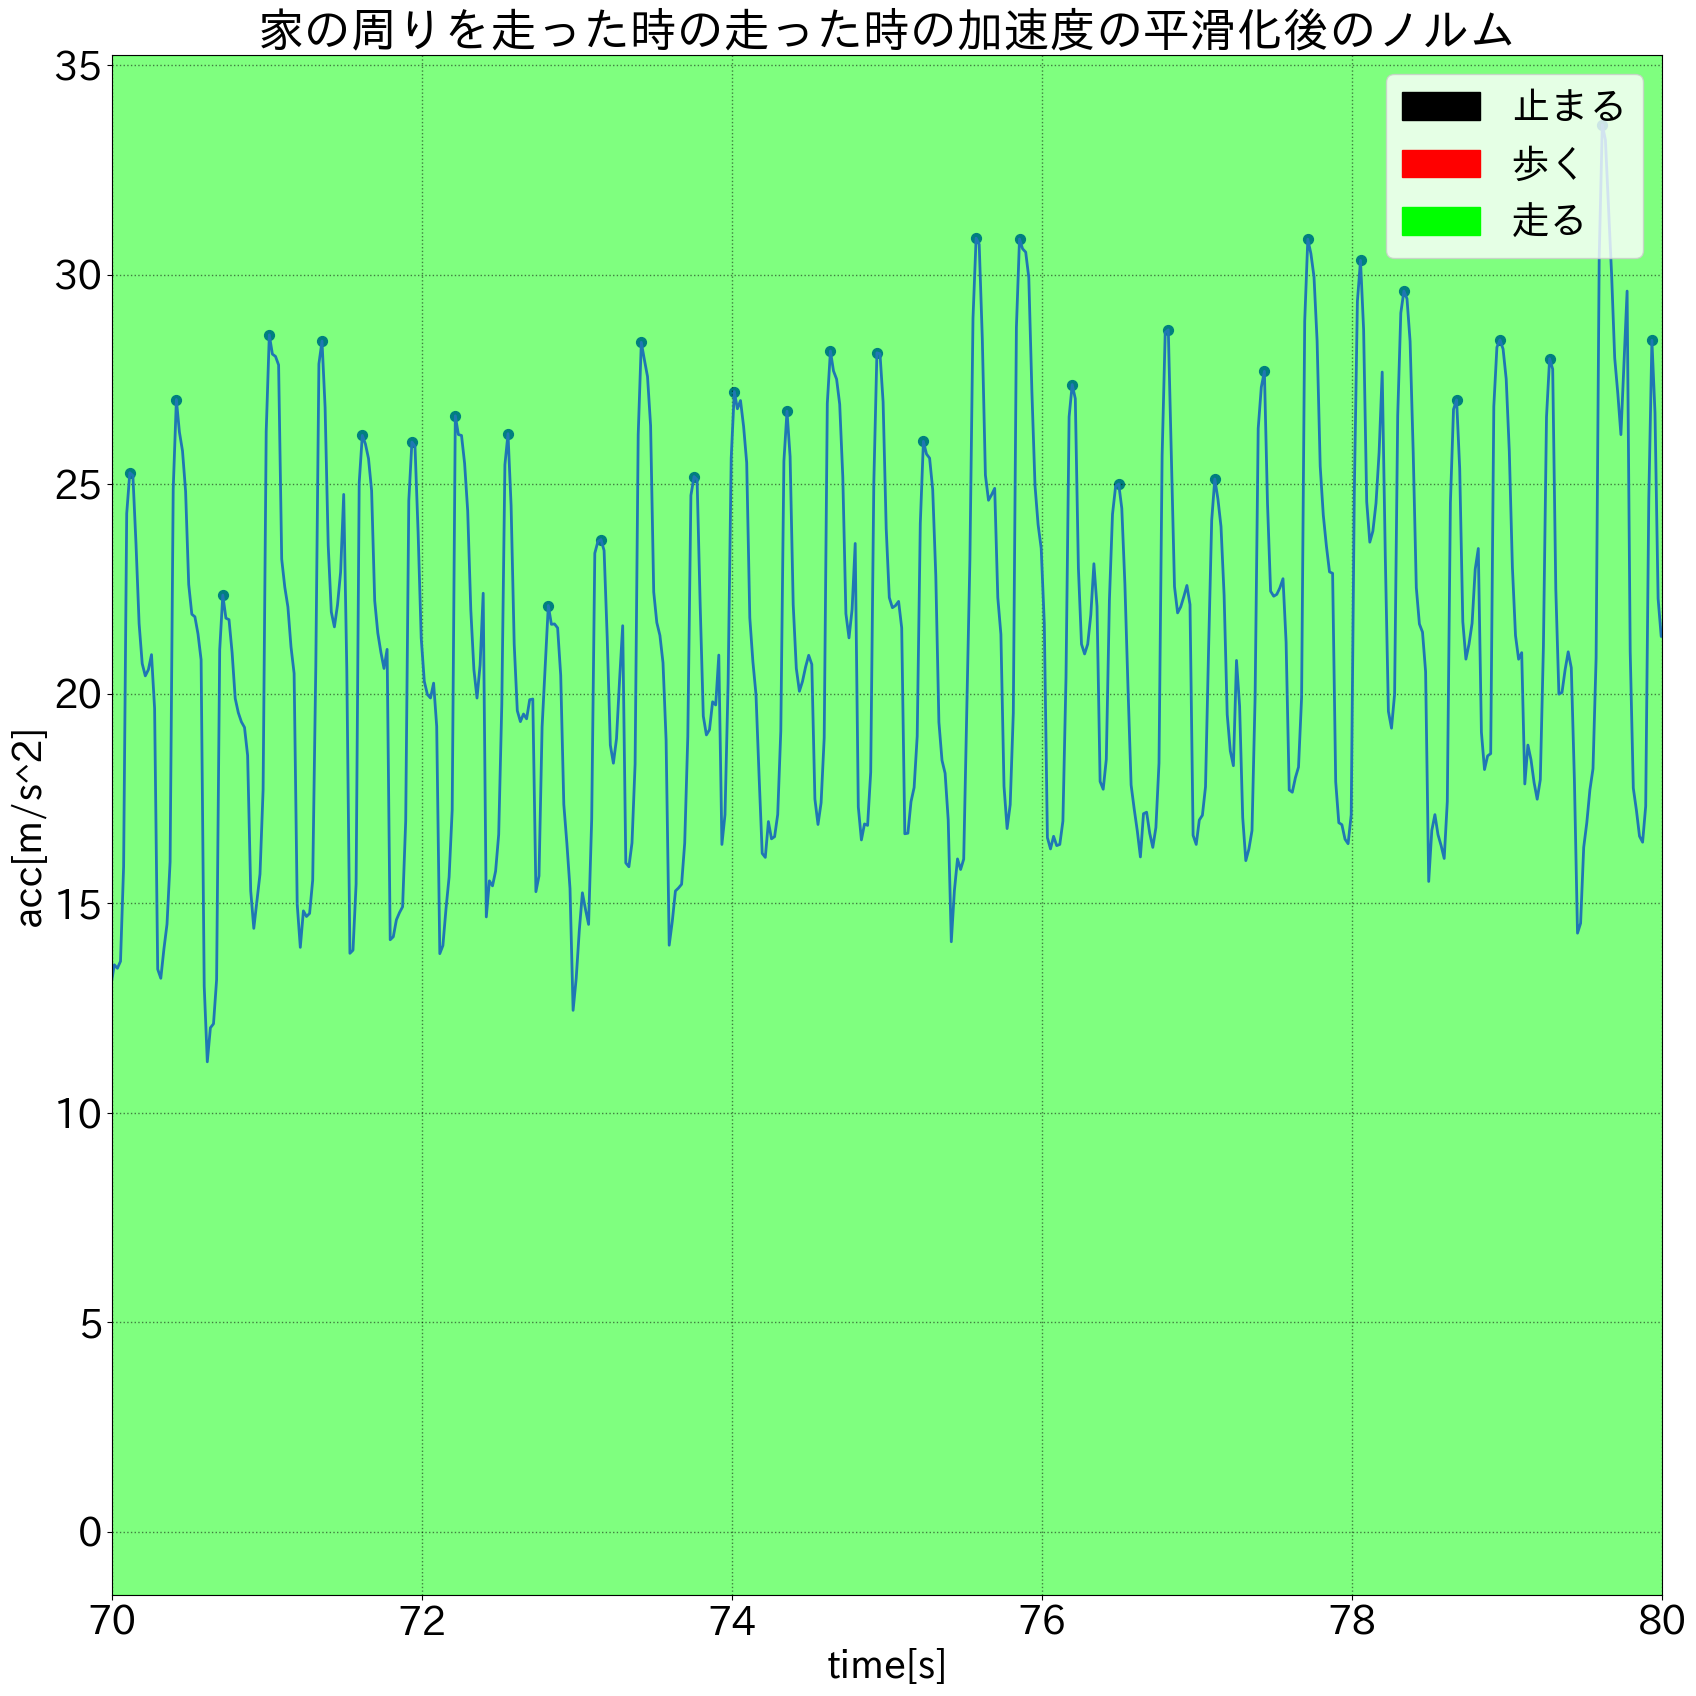

In [108]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("家の周りを走った時の走った時の加速度の平滑化後のノルム")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作

x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

## ノイズ除去
ax3.plot(
    (acc["time"]),
    norm_acc,
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

## ピーク値を取得
peak , _ = signal.find_peaks(norm_acc, height=5, distance=10)
plt.scatter(acc["time"][peak], norm_acc[peak], c="b", s=50)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}


## 表示するデータの範囲を指定秒数にする
start_time = 70
end_time = 80
ax3.set_xlim(start_time, end_time)

## 周波数の取得
new_peak = []
for i in range(len(peak) - 1):
    ## endtime - starttimeの間にピークがあるかどうか
    # print(acc["time"][peak[i]])
    if (acc["time"][peak[i]] > start_time ) and (acc["time"][peak[i]] < end_time ):
        new_peak.append(peak[i])
freq = len(new_peak) / (end_time - start_time)
print("周波数", freq)

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

In [106]:
# content毎に分割して、BLEのデータをFFTしてみる
# 椅子に座るだけ取得したデータを使う
# ansデータを使って、椅子に座っているかどうかを判定する

# 1. windowサイズ20データ分を用いて、FFTを行う
window_size = 200
for i in range(0, len(acc) - window_size, window_size):
    # 1.1. windowサイズ20データ分を取得する
    fft_acc_data = acc[i:i+window_size]   

    print(f"window_data: {fft_acc_data}")

    # print(f"fft_isu_data: {len(fft_isu_data)}")
    # print(f"fft_tent_data: {len(fft_tent_data)}")

    if debugMode:
        # fft_isu_dataをグラフ化する
        ## ｘ軸を時間にする
        ## y軸をrssiにする

        # 2. データをグラフ化する
        # 2.1. グラフのタイトルを設定する
        plt.figure(figsize=(20, 20))
        plt.title(f"加速度のデータ　{window_size}個分")
        # 2.2. グラフのx軸のラベルを設定する
        plt.xlabel("time(s)")
        # 2.3. グラフのy軸のラベルを設定する
        plt.ylabel("acc (m/s^2))")
        # 2.4. グラフのx軸の表示範囲を設定する
        # plt.xlim(start_time, end_time)
        # 2.5. グラフのy軸の表示範囲を設定する
        # plt.ylim(-100, -40)
        # 2.6. グラフにデータを追加する
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["x"].rolling(window=10).mean(), label="x")
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["y"].rolling(window=10).mean(), label="y")
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["z"].rolling(window=10).mean(), label="z")



        # 2.7. グラフに凡例を追加する
        plt.legend()
        # 2.8. グラフを表示する
        plt.show()






window_data:          time         x         y         z       abs
0    0.273055  0.114922  0.057461 -0.124498  0.178910
1    0.293081 -0.086191  0.134075 -0.201113  0.256616
2    0.313069 -0.019154  0.229843 -0.268151  0.353694
3    0.333063 -0.095768  0.239420 -0.095768  0.275073
4    0.353052  0.076614  0.095768  0.248997  0.277562
..        ...       ...       ...       ...       ...
195  4.173077  0.679953 -0.019154  1.426944  1.580782
196  4.193112  0.967257 -0.143652  1.493982  1.785554
197  4.213060  1.398214  0.019154  0.679953  1.554897
198  4.233055  2.030283 -0.430956  0.632069  2.169628
199  4.253060  2.030283 -0.430956  0.632069  2.169628

[200 rows x 5 columns]
window_data:          time         x         y         z       abs
200  4.273045  1.283292 -1.800440  0.756568  2.336839
201  4.293283 -0.938527 -3.734955 -1.034295  3.987541
202  4.313046  0.201113 -2.068590 -0.737414  2.205287
203  4.333060 -0.651223 -3.112462 -1.666364  3.590026
204  4.353052 -1.714248 -3.71580

サンプリング周波数: 50.00600167183654 Hz
            time content
0  1692566110576     止まる
1  1692566123808      歩く
2  1692566153810      走る
3  1692566176662      歩く
4  1692566213808      走る
5  1692566233789      歩く
6  1692566235061     止まる
17.0 30.232
30.232 60.234
60.234 83.086
83.086 120.232
120.232 140.213
140.213 141.485
141.485 166.513101


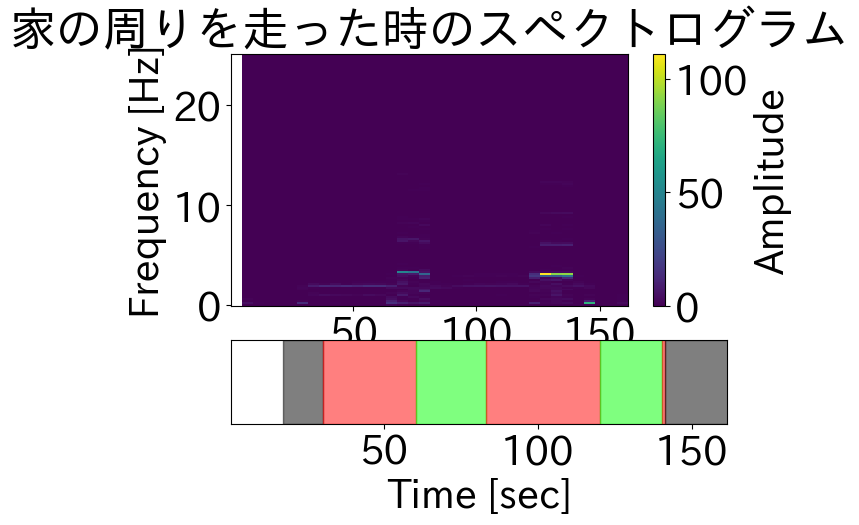

In [107]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point for data_point in data]
    time_interval = time_stamps[-1] - time_stamps[0]
    sampling_frequency = 1 / (time_interval / len(data))
    return sampling_frequency


# 以下、元のコードからの続き
x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

fs = calculate_sampling_frequency(acc["time"])
norm = abs(norm_acc)

print("サンプリング周波数: {} Hz".format(fs))

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(norm, fs)

# サブプロットを作成
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# スペクトログラムをax1に表示
cax = ax1.pcolormesh(t, f, Sxx)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title("家の周りを走った時のスペクトログラム")
cbar1 = fig.colorbar(cax, ax=ax1)
cbar1.set_label("Amplitude")

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}
print(ans)
# 正解データをax2に表示
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + paddingTime) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + paddingTime) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)

    ax2.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

ax2.set_xlabel('Time [sec]')
ax2.set_yticks([])
ax2.set_xlim(ax1.get_xlim())

plt.show()
